In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv("hr.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Casual analysis:

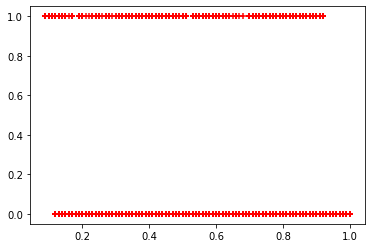

In [46]:
plt.scatter(df.satisfaction_level, df.left, marker='+', color='red')

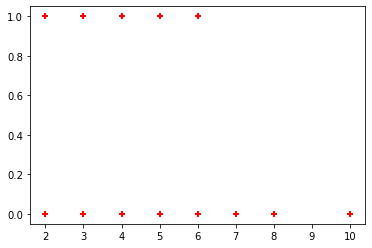

In [47]:
plt.scatter(df.time_spend_company, df.left, marker='+', color='red')

### One Hot Encoding for later

In [50]:
dummies = pd.get_dummies(df['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [51]:
dummies.drop(['high'], axis=1, inplace=True)
dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [52]:
final_df = pd.concat([df, dummies], axis=1)
final_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1,0


In [53]:
final_df.drop(['salary'], axis=1, inplace=True)
final_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,1,0


# Data exploration and visualization

In [57]:
left = df[df.left==1]
left.shape

(3571, 10)

In [58]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [59]:
# Average numbers for all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Impact of salary on employee retention

In [60]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

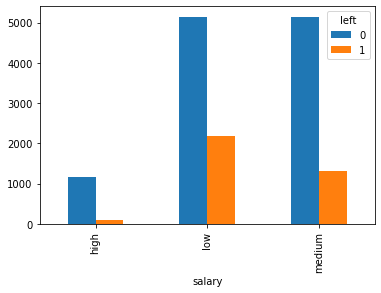

In [61]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

### Department wise employee retention rate

In [62]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

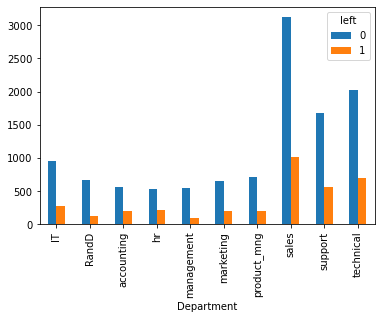

In [63]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

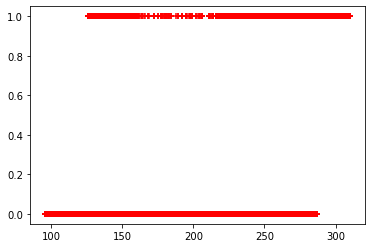

In [67]:
plt.scatter(df.average_montly_hours, df.left, marker='+', color='red')

<AxesSubplot:xlabel='promotion_last_5years'>

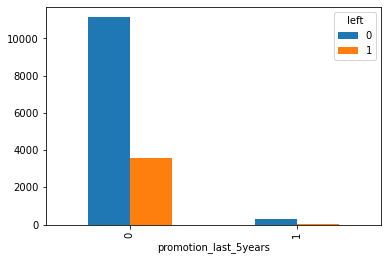

In [71]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind='bar')

### Hence from the analysis, important features are:
    - Satisfaction level
    - Average Monthly Hours
    - Promotion last five years

# Extracting Features for X and Y

In [73]:
x = final_df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'low', 'medium']]
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [74]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [75]:
x.shape

(14999, 5)

In [76]:
y.shape

(14999,)

# Model train:

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2)

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [80]:
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy:

In [82]:
model.score(x_test, y_test)

0.7851666666666667